<a href="https://colab.research.google.com/github/xahinds2/MachineLearning/blob/main/Hearbeat_Arrhythmia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## i have already copied the datasets in my gdrive for less effort
## u can download and upload it from local storage or using kaggle api token just uncomment the codes

In [3]:
# # KAGGLE
# !pip install --upgrade --force-reinstall --no-deps kaggle

# from google.colab import files
# files.upload()

# ! mkdir ~/.kaggle
# ! mv kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

In [4]:
# !kaggle datasets download -d shayanfazeli/heartbeat

In [5]:
# !unzip /content/heartbeat.zip

In [6]:
# !cp /content/mitbih_train.csv /content/drive/MyDrive/datasets
# !cp /content/mitbih_test.csv /content/drive/MyDrive/datasets

To convert edf to csv

In [7]:
# ! pip install mne
# import mne

# infname = 'raw.edf'
# outfname = 'raw.csv'

# edf = mne.io.read_raw_edf(infname)
# header = ','.join(edf.ch_names)
# np.savetxt('raw.csv', edf.get_data().T, delimiter=',', header=header)

Read csv file from my Google drive

In [8]:
train_df=pd.read_csv('/content/drive/MyDrive/datasets/mitbih_train.csv', header=None)
test_df=pd.read_csv('/content/drive/MyDrive/datasets/mitbih_test.csv', header=None)

First 5 rows of the dataframe

In [9]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are 87554 entries in rows, 186 train_features and column '187' is the train_label

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [11]:
# checking info of each features
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,87554.0,0.890360,0.240909,0.0,0.921922,0.991342,1.000000,1.0
1,87554.0,0.758160,0.221813,0.0,0.682486,0.826013,0.910506,1.0
2,87554.0,0.423972,0.227305,0.0,0.250969,0.429472,0.578767,1.0
3,87554.0,0.219104,0.206878,0.0,0.048458,0.166000,0.341727,1.0
4,87554.0,0.201127,0.177058,0.0,0.082329,0.147878,0.258993,1.0
...,...,...,...,...,...,...,...,...
183,87554.0,0.003471,0.036255,0.0,0.000000,0.000000,0.000000,1.0
184,87554.0,0.003221,0.034789,0.0,0.000000,0.000000,0.000000,1.0
185,87554.0,0.002945,0.032865,0.0,0.000000,0.000000,0.000000,1.0
186,87554.0,0.002807,0.031924,0.0,0.000000,0.000000,0.000000,1.0


In [12]:
# showing column wise %ge of NaN values they contains 
null_col = []

for i in train_df.columns:
  if train_df[i].isna().mean()*100 > 0:
    print(i,"\t-\t", train_df[i].isna().mean()*100)
    null_col.append(i)


found = False
if(len(null_col) >= 1): found = True
if found == False: print("No null column found")
else : print(null_col)

No null column found


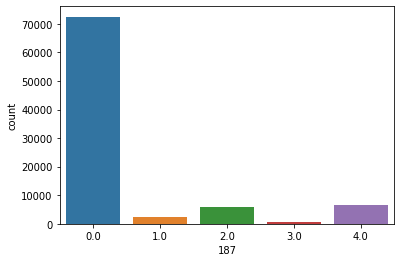

In [13]:
sns.countplot(x=187, data = train_df)

data is unblance, so i am downsampling the class_0 to 10%

In [14]:
class_1 = train_df[train_df[187]==1.0]
class_2 = train_df[train_df[187]==2.0]
class_3 = train_df[train_df[187]==3.0]
class_4 = train_df[train_df[187]==4.0]
class_0 = train_df[train_df[187]==0.0].sample(frac = 0.1) # 10% beacause it seems closer to others

In [15]:
len(class_0)

7247

In [16]:
df = pd.concat([class_0, class_1, class_2, class_3, class_4])

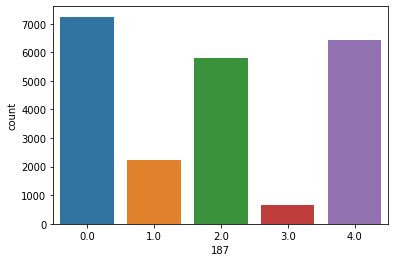

In [17]:
sns.countplot(x=187, data = df)

In [18]:
df.groupby(187)[187].count()

187
0.0    7247
1.0    2223
2.0    5788
3.0     641
4.0    6431
Name: 187, dtype: int64

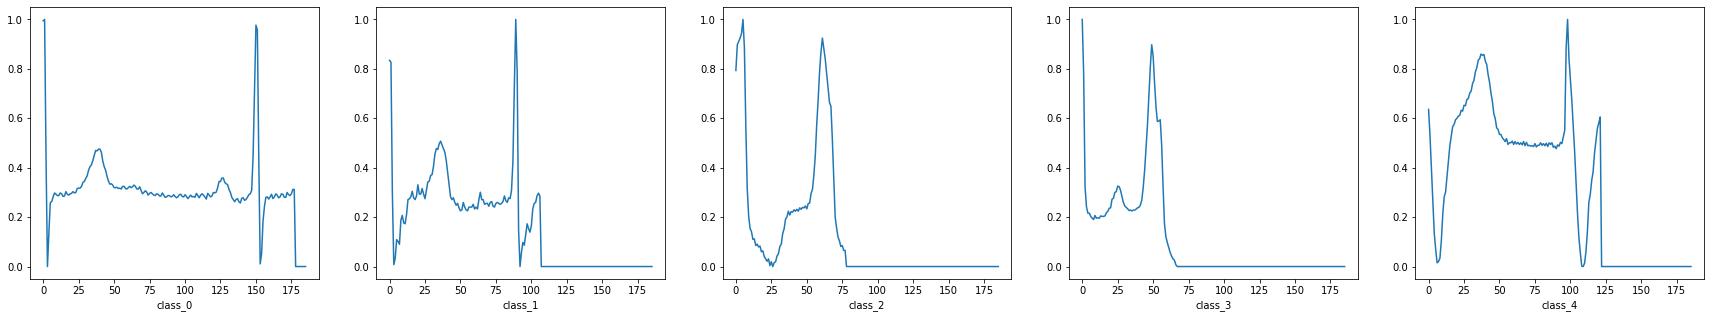

In [19]:
plt.figure(figsize = (30, 5))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.plot(df[df[187] == float(i)].sample(1).iloc[0,:186])
  plt.xlabel('class_'+str(i))

In [20]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop([187], axis=1), df[187], test_size = 0.1)

In [21]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [23]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu'))
model.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    

model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 1024, activation='relu'))

model.add(Dense(units = 5, activation='softmax'))

In [24]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
629/629 [==============================] - 19s 11ms/step - loss: 0.3932 - accuracy: 0.8593
Epoch 2/10
629/629 [==============================] - 6s 10ms/step - loss: 0.2021 - accuracy: 0.9316
Epoch 3/10
629/629 [==============================] - 6s 10ms/step - loss: 0.1542 - accuracy: 0.9466
Epoch 4/10
629/629 [==============================] - 6s 10ms/step - loss: 0.1258 - accuracy: 0.9567
Epoch 5/10
629/629 [==============================] - 6s 10ms/step - loss: 0.0992 - accuracy: 0.9650
Epoch 6/10
629/629 [==============================] - 6s 10ms/step - loss: 0.0891 - accuracy: 0.9699
Epoch 7/10
629/629 [==============================] - 6s 10ms/step - loss: 0.0758 - accuracy: 0.9725
Epoch 8/10
629/629 [==============================] - 6s 10ms/step - loss: 0.0682 - accuracy: 0.9751
Epoch 9/10
629/629 [==============================] - 6s 10ms/step - loss: 0.0563 - accuracy: 0.9795
Epoch 10/10
629/629 [==============================] - 7s 10ms/step - loss: 0.0511 - accur

In [26]:
y_pred = model.predict(X_test)

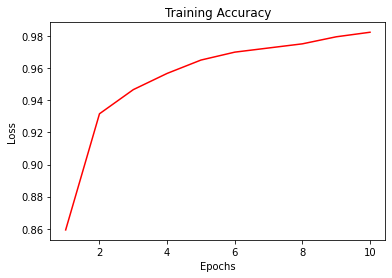

In [27]:
acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color='red', label='Training acc')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

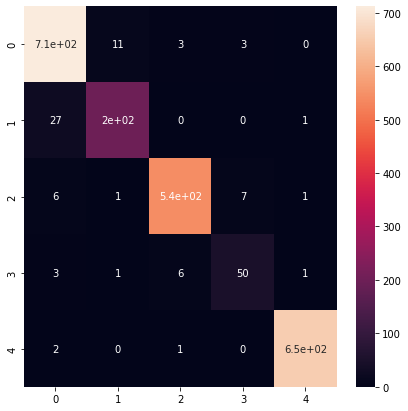

In [28]:
from sklearn.metrics import confusion_matrix

y_lbl = [np.where(i == np.max(i))[0][0] for i in y_pred]
mat = confusion_matrix(y_test, y_lbl)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(mat, annot = True)

In [29]:
# Measure the Accuracy Score

from sklearn import metrics

print("Accuracy score of the predictions: {0} %".format(metrics.accuracy_score(y_lbl, y_test) * 100))

Accuracy score of the predictions: 96.68607254814151 %


In [30]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,0.102083,0.122917,0.150000,0.168750,0.172917,0.170833,0.168750,0.164583,0.156250,0.152083,0.147917,0.147917,0.145833,0.145833,0.141667,0.141667,0.147917,0.158333,0.168750,0.179167,0.191667,0.206250,0.220833,0.239583,0.258333,0.275000,0.287500,0.308333,0.320833,0.331250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,0.080537,0.104027,0.093960,0.117450,0.097315,0.134228,0.124161,0.161074,0.171141,0.194631,0.204698,0.261745,0.275168,0.332215,0.345638,0.395973,0.406040,0.456376,0.446309,0.446309,0.399329,0.369128,0.308725,0.295302,0.265101,0.271812,0.258389,0.268456,0.261745,0.281879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


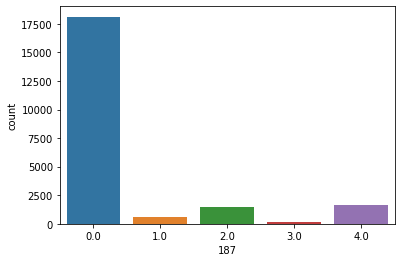

In [31]:
sns.countplot(x=187, data = test_df)

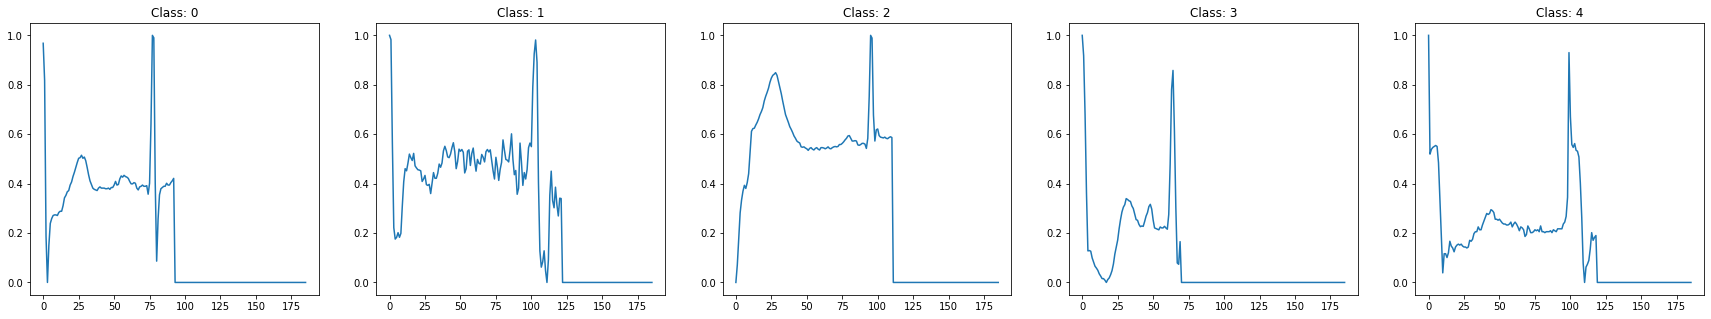

In [32]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(30,5))

for i in range(5):
  ax[i].plot(test_df[test_df[187]==float(i)].sample(1).iloc[0,:186])
  ax[i].set_title('Class: '+str(i))

In [34]:
test_X = test_df.drop([187], axis=1) 
test_y = test_df[187]

test_X = np.array(test_X).reshape(test_X.shape[0], test_X.shape[1], 1)

In [35]:
test_pred_y = model.predict(test_X)

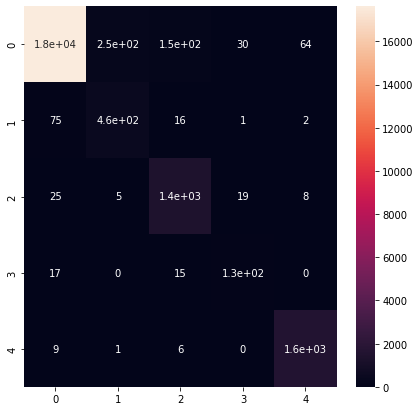

In [36]:
from sklearn.metrics import confusion_matrix

test_lbl_y = [np.where(i == np.max(i))[0][0] for i in test_pred_y]
mat = confusion_matrix(test_y, test_lbl_y)
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(mat, annot = True)

In [37]:
# Measure the Accuracy Score

from sklearn import metrics

print("Accuracy score of the predictions: {0}".format(metrics.accuracy_score(test_lbl_y, test_y) * 100))

Accuracy score of the predictions: 96.82989219806322
